# Please run all notebooks at once
# Authors:


# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import math
import seaborn as sns


# Data loading

In [2]:
file_path = "data/data.csv"
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'Shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
data = pd.read_csv(file_path, header=None, names=column_names)


# First part - calculating sex distribution

In [3]:
counter = data['sex'].value_counts()
sex_distribution = pd.DataFrame({
    '': counter.index,
    'count': counter.values,
    '%': (counter.values / len(data) * 100).round(2)
})

sex_distribution[''] = sex_distribution[''].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'})

sex_distribution.set_index([''], inplace=True)
display(sex_distribution)


,count,%
,,
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


# Second part - calculating statistics for the quantitative variables in the dataset

In [4]:
distributions = []
columns_to_count = ['length', 'diameter', 'height', 'whole_weight', 'Shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

column_map = {'length' : 'Lenght', 'diameter' : 'Diameter', 'height' : 'Height', 'whole_weight' : 'Whole weight', 'Shucked_weight' : 'Shucked weight', 'viscera_weight' : 'Viscera weight', 'shell_weight' : 'Shell weight', 'rings' : 'Rings'}

for i in columns_to_count:
        values = data[i].describe().drop('count').round(2)
        
        distribution = pd.DataFrame(values).T
        distribution.index = [column_map[i]]
        
        distributions.append(distribution) 
        
distributions = pd.concat(distributions)

display(distributions)

,mean,std,min,25%,50%,75%,max
Lenght,0.52,0.12,0.08,0.45,0.55,0.62,0.82
Diameter,0.41,0.10,0.06,0.35,0.42,0.48,0.65
Height,0.14,0.04,0.00,0.12,0.14,0.16,1.13
Whole weight,0.83,0.49,0.00,0.44,0.80,1.15,2.83
Shucked weight,0.36,0.22,0.00,0.19,0.34,0.50,1.49
Viscera weight,0.18,0.11,0.00,0.09,0.17,0.25,0.76
Shell weight,0.24,0.14,0.00,0.13,0.23,0.33,1.00
Rings,9.93,3.22,1.00,8.00,9.00,11.00,29.00


# Third part - Bar plots

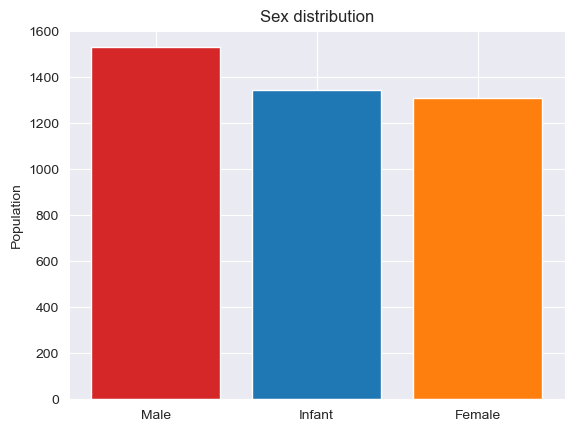

In [5]:
fig, ax = plt.subplots()
counter = data['sex'].value_counts()
sex = counter.index.values
index = []
for i in sex:
    sex = [{'M': 'Male', 'F': 'Female', 'I': 'Infant'}.get(i, i)]
    index.append(sex[0])

bar_labels = index
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
ax.bar(index, counter.values, label=bar_labels, color=bar_colors)
ax.set_ylabel('Population')
ax.set_title('Sex distribution')

plt.show()

# Fourth part - Histograms

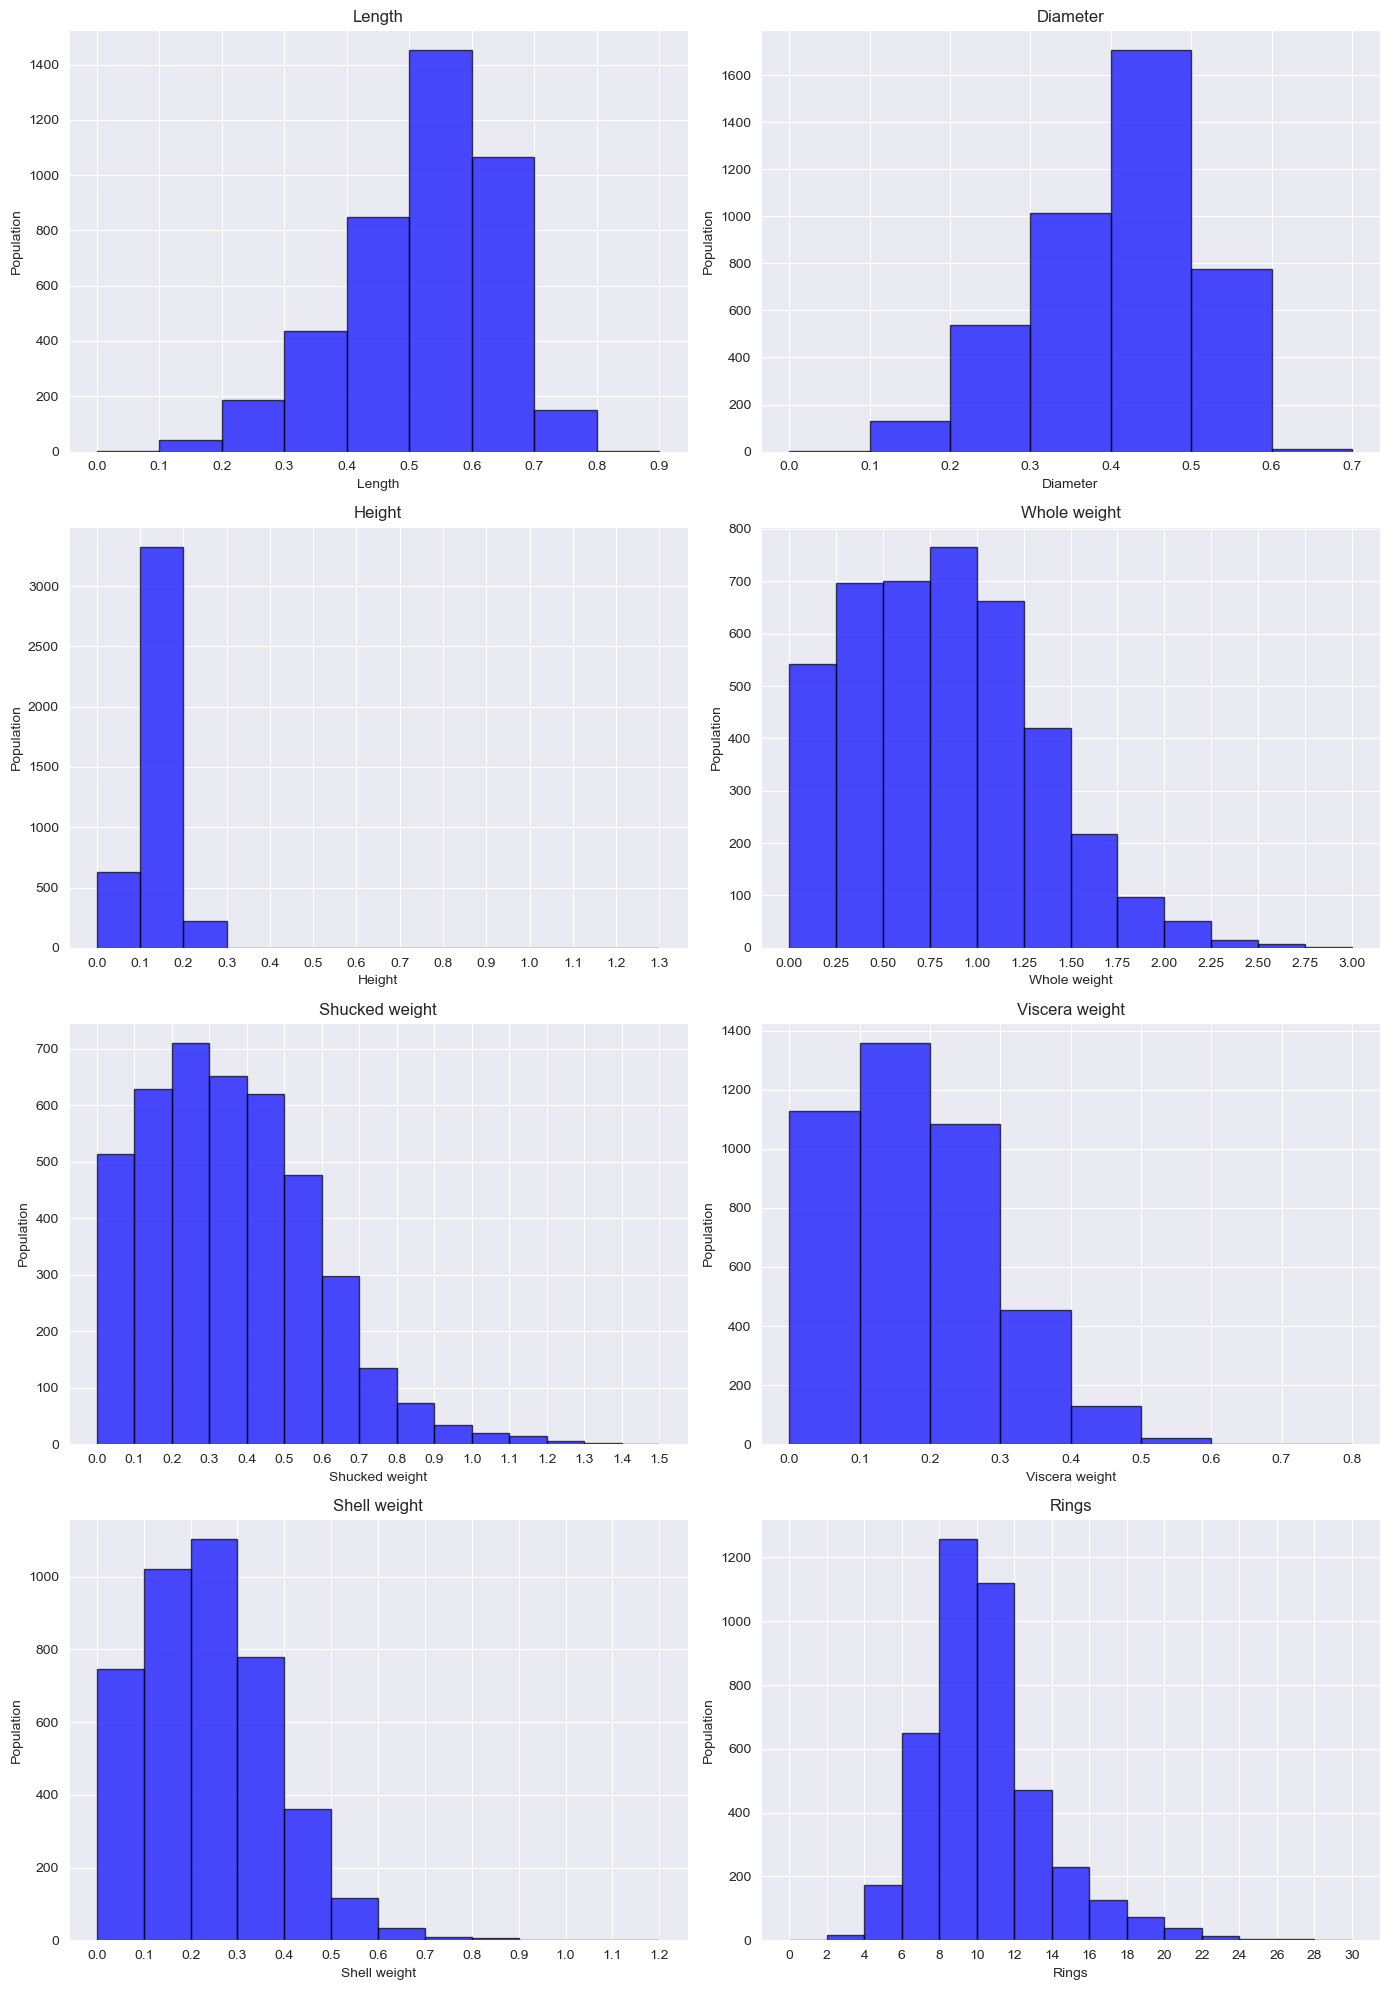

In [6]:
fig, axs = plt.subplots(4, 2, tight_layout=True, figsize=(14, 20))

titles = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
labels = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
bins_width = {'length' : 0.1, 
        'diameter' : 0.1, 
        'height' : 0.1, 
        'whole_weight' : 0.25, 
        'Shucked_weight' : 0.1, 
        'viscera_weight' : 0.1, 
        'shell_weight' : 0.1, 
        'rings' : 2}
    
bin_index = 0
for i, ax in enumerate(axs.flat):
    counter_quantity = data[columns_to_count[bin_index]].values
    bin_width = bins_width[columns_to_count[bin_index]]
    first_bin = math.floor(min(counter_quantity) / bin_width) * bin_width
    last_bin = math.ceil(max(counter_quantity) / bin_width) * bin_width
    bins = np.arange(first_bin, last_bin + bin_width, bin_width)
    
    ax.hist(counter_quantity, bins=bins, color='blue', edgecolor='black', alpha=0.7)
    ax.set_title(f'{titles[i]}')
    ax.set_xlabel(f'{labels[i]}')
    ax.set_ylabel('Population')
    ax.set_xticks(np.arange(first_bin, last_bin + bin_width, bin_width))
    
    bin_index += 1
    
plt.show()


# Fifth part - Scatter plots

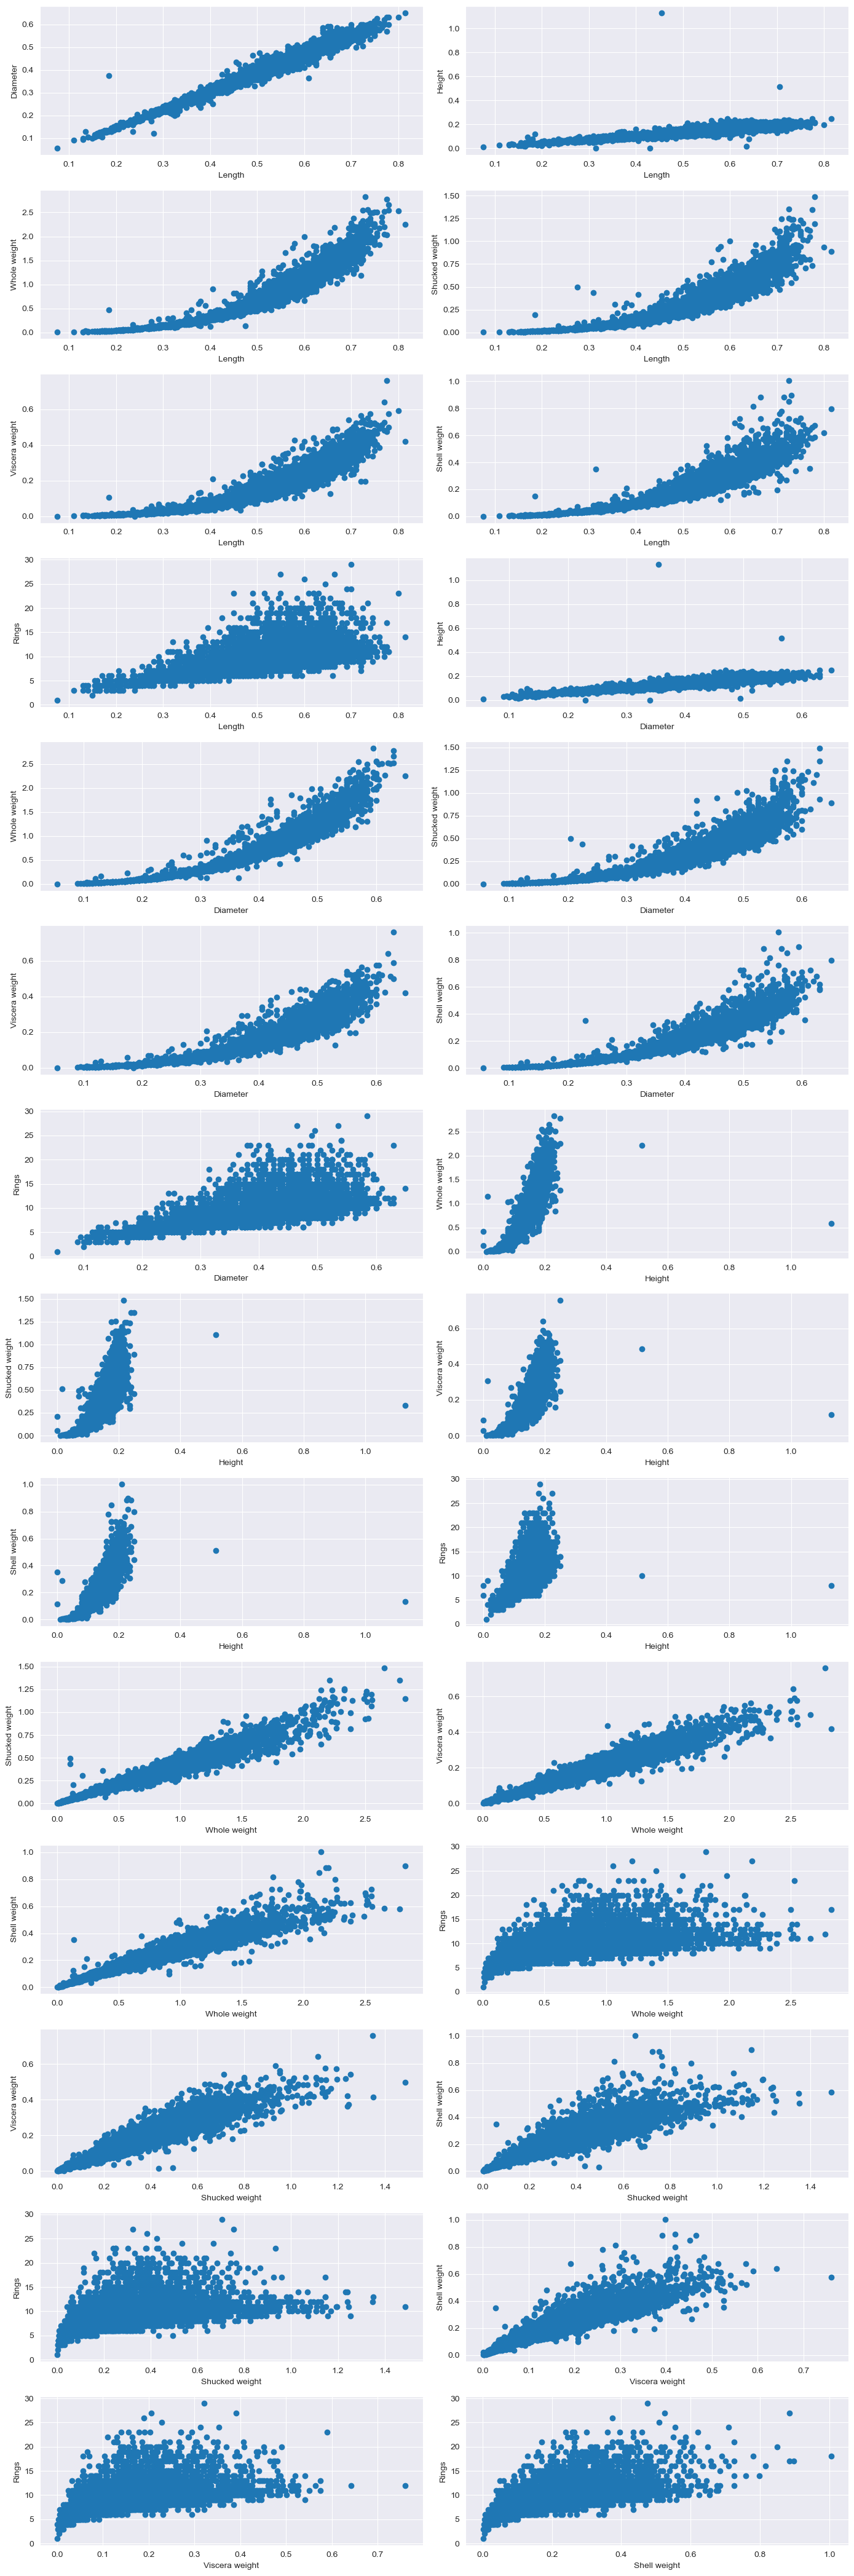

In [7]:
fig, axs = plt.subplots(14, 2, tight_layout=True, figsize=(14, 42))

index_x, index_y = 0, 0
visited = set()
for i in range(len(columns_to_count)):
    for j in range(i + 1, len(columns_to_count)):
        ax = axs[index_x, index_y]
        ax.scatter(data[columns_to_count[i]], data[columns_to_count[j]])
        ax.set_xlabel(labels[i])
        ax.set_ylabel(labels[j])
        
        index_y += 1
        if index_y >= axs.shape[1]:
            index_y = 0
            index_x += 1    
            if index_x >= axs.shape[0]:
                break
        visited.add((i, j))
    if index_x >= axs.shape[0]:
                break   
plt.show()

# Sixth part - Correlation matrix

In [8]:
data_correlation = pd.read_csv(file_path, header=None, names=column_names, index_col=0)
correlation_matrix = data_correlation.corr()

correlation_matrix.columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
correlation_matrix.index = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

correlation_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Seventh part - Heatmap of linear correlation matrix

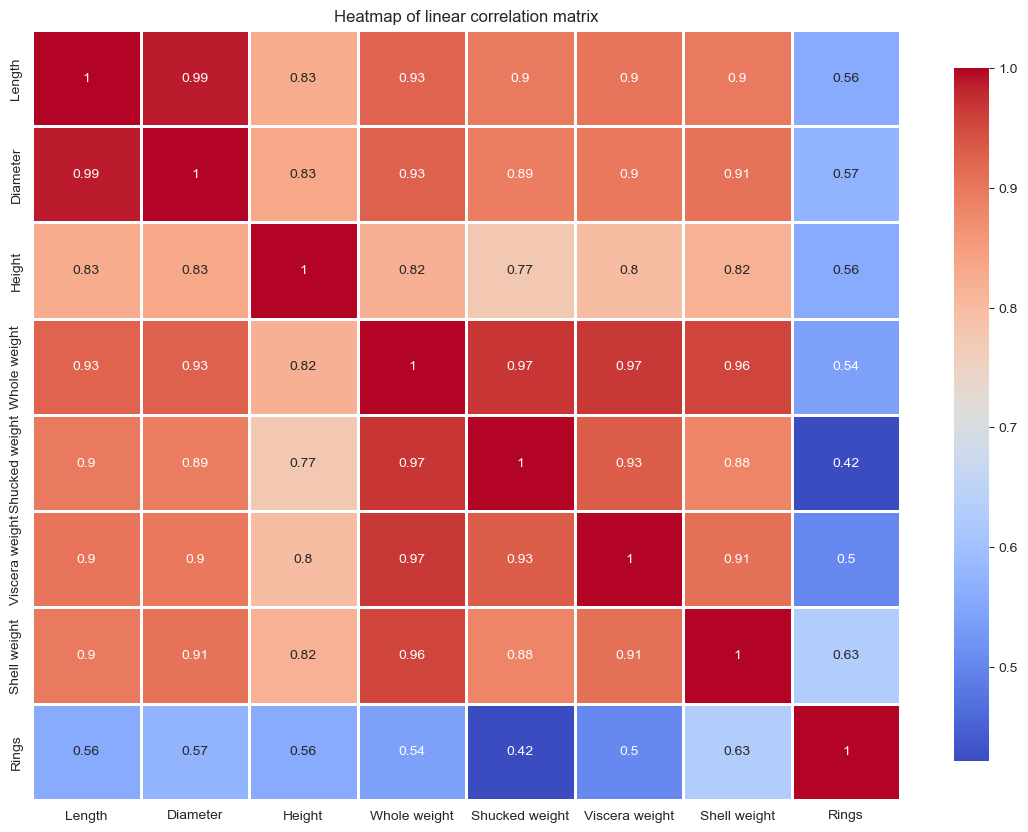

In [9]:
plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8, cbar_kws={"shrink": 0.9})
plt.title('Heatmap of linear correlation matrix')

plt.show()

# Eight part - linear regression plot

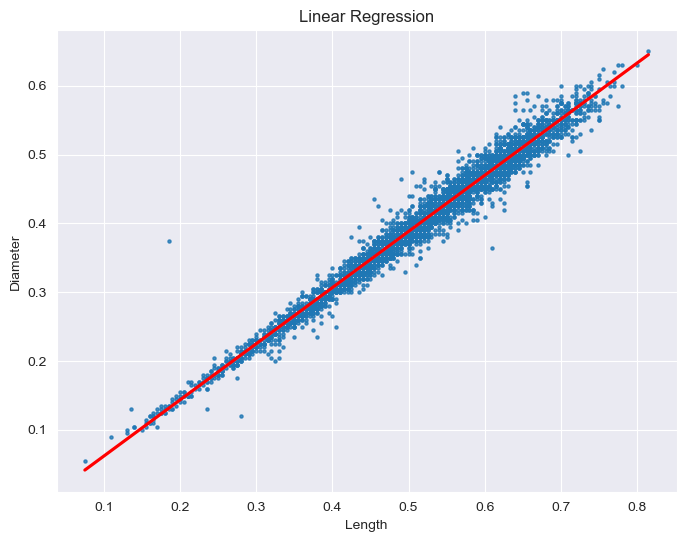

In [10]:
correlation_matrix_names = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

most_correlated = correlation_matrix.unstack().sort_values()
most_correlated = most_correlated[most_correlated != True].last_valid_index()

v1, v2 = most_correlated

plt.figure(figsize=(8, 6))
sns.regplot(x=columns_to_count[correlation_matrix_names.index(v1)], y=columns_to_count[correlation_matrix_names.index(v2)], data=data, scatter_kws={'s':5}, line_kws={'color':'red'})
plt.title(f'Linear Regression')
plt.xlabel(v1)
plt.ylabel(v2)
plt.show()


# First part for grade 5 - calculating statistics for the quantitative variables in the dataset diversity the sex

In [11]:
distributions = []

column_map = {'length' : 'Lenght', 'diameter' : 'Diameter', 'height' : 'Height', 'whole_weight' : 'Whole weight', 'Shucked_weight' : 'Shucked weight', 'viscera_weight' : 'Viscera weight', 'shell_weight' : 'Shell weight', 'rings' : 'Rings'}

groups = data.groupby('sex')

for i in columns_to_count:
    for sex, group_data in groups:
        values = group_data[i].describe().drop('count').round(2)
        
        distribution = pd.DataFrame(values).T
        distribution['Sex'] = sex
        distribution['Feature'] = column_map[i]
        
        distributions.append(distribution)
        
distributions = pd.concat(distributions)

distributions['Sex'] = distributions['Sex'].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'})

distributions.set_index(['Feature', 'Sex'], inplace=True)
display(distributions)


mean   std   min   25%    50%    75%    max
Feature        Sex                                                 
Lenght         Female   0.58  0.09  0.28  0.52   0.59   0.64   0.82
               Infant   0.43  0.11  0.08  0.36   0.44   0.51   0.72
               Male     0.56  0.10  0.16  0.50   0.58   0.63   0.78
Diameter       Female   0.45  0.07  0.20  0.41   0.46   0.50   0.65
               Infant   0.33  0.09  0.06  0.27   0.34   0.39   0.55
               Male     0.44  0.08  0.11  0.40   0.46   0.50   0.63
Height         Female   0.16  0.04  0.02  0.14   0.16   0.18   1.13
               Infant   0.11  0.03  0.00  0.08   0.11   0.13   0.22
               Male     0.15  0.03  0.02  0.13   0.16   0.18   0.52
Whole weight   Female   1.05  0.43  0.08  0.73   1.04   1.32   2.66
               Infant   0.43  0.29  0.00  0.21   0.38   0.60   2.05
               Male     0.99  0.47  0.02  0.67   0.98   1.27   2.83
Shucked weight Female   0.45  0.20  0.03  0.30   0.44   0.57   1.49
               Infant   0.19  0.13  0.00  0.09   0.17   0.27   0.77
               Male     0.43  0.22  0.01  0.28   0.42   0.57   1.35
Viscera weight Female   0.23  0.10  0.02  0.16   0.22   0.30   0.59
               Infant   0.09  0.06  0.00  0.04   0.08   0.13   0.44
               Male     0.22  0.10  0.00  0.15   0.21   0.28   0.76
Shell weight   Female   0.30  0.13  0.02  0.21   0.30   0.38   1.00
               Infant   0.13  0.08  0.00  0.06   0.11   0.18   0.66
               Male     0.28  0.13  0.00  0.19   0.28   0.36   0.90
Rings          Female  11.13  3.10  5.00  9.00  10.00  12.00  29.00
               Infant   7.89  2.51  1.00  6.00   8.00   9.00  21.00
               Male    10.71  3.03  3.00  9.00  10.00  12.00  27.00

# Second part for grade 5 - boxplots for the quantitative variables in the dataset diversity the sex

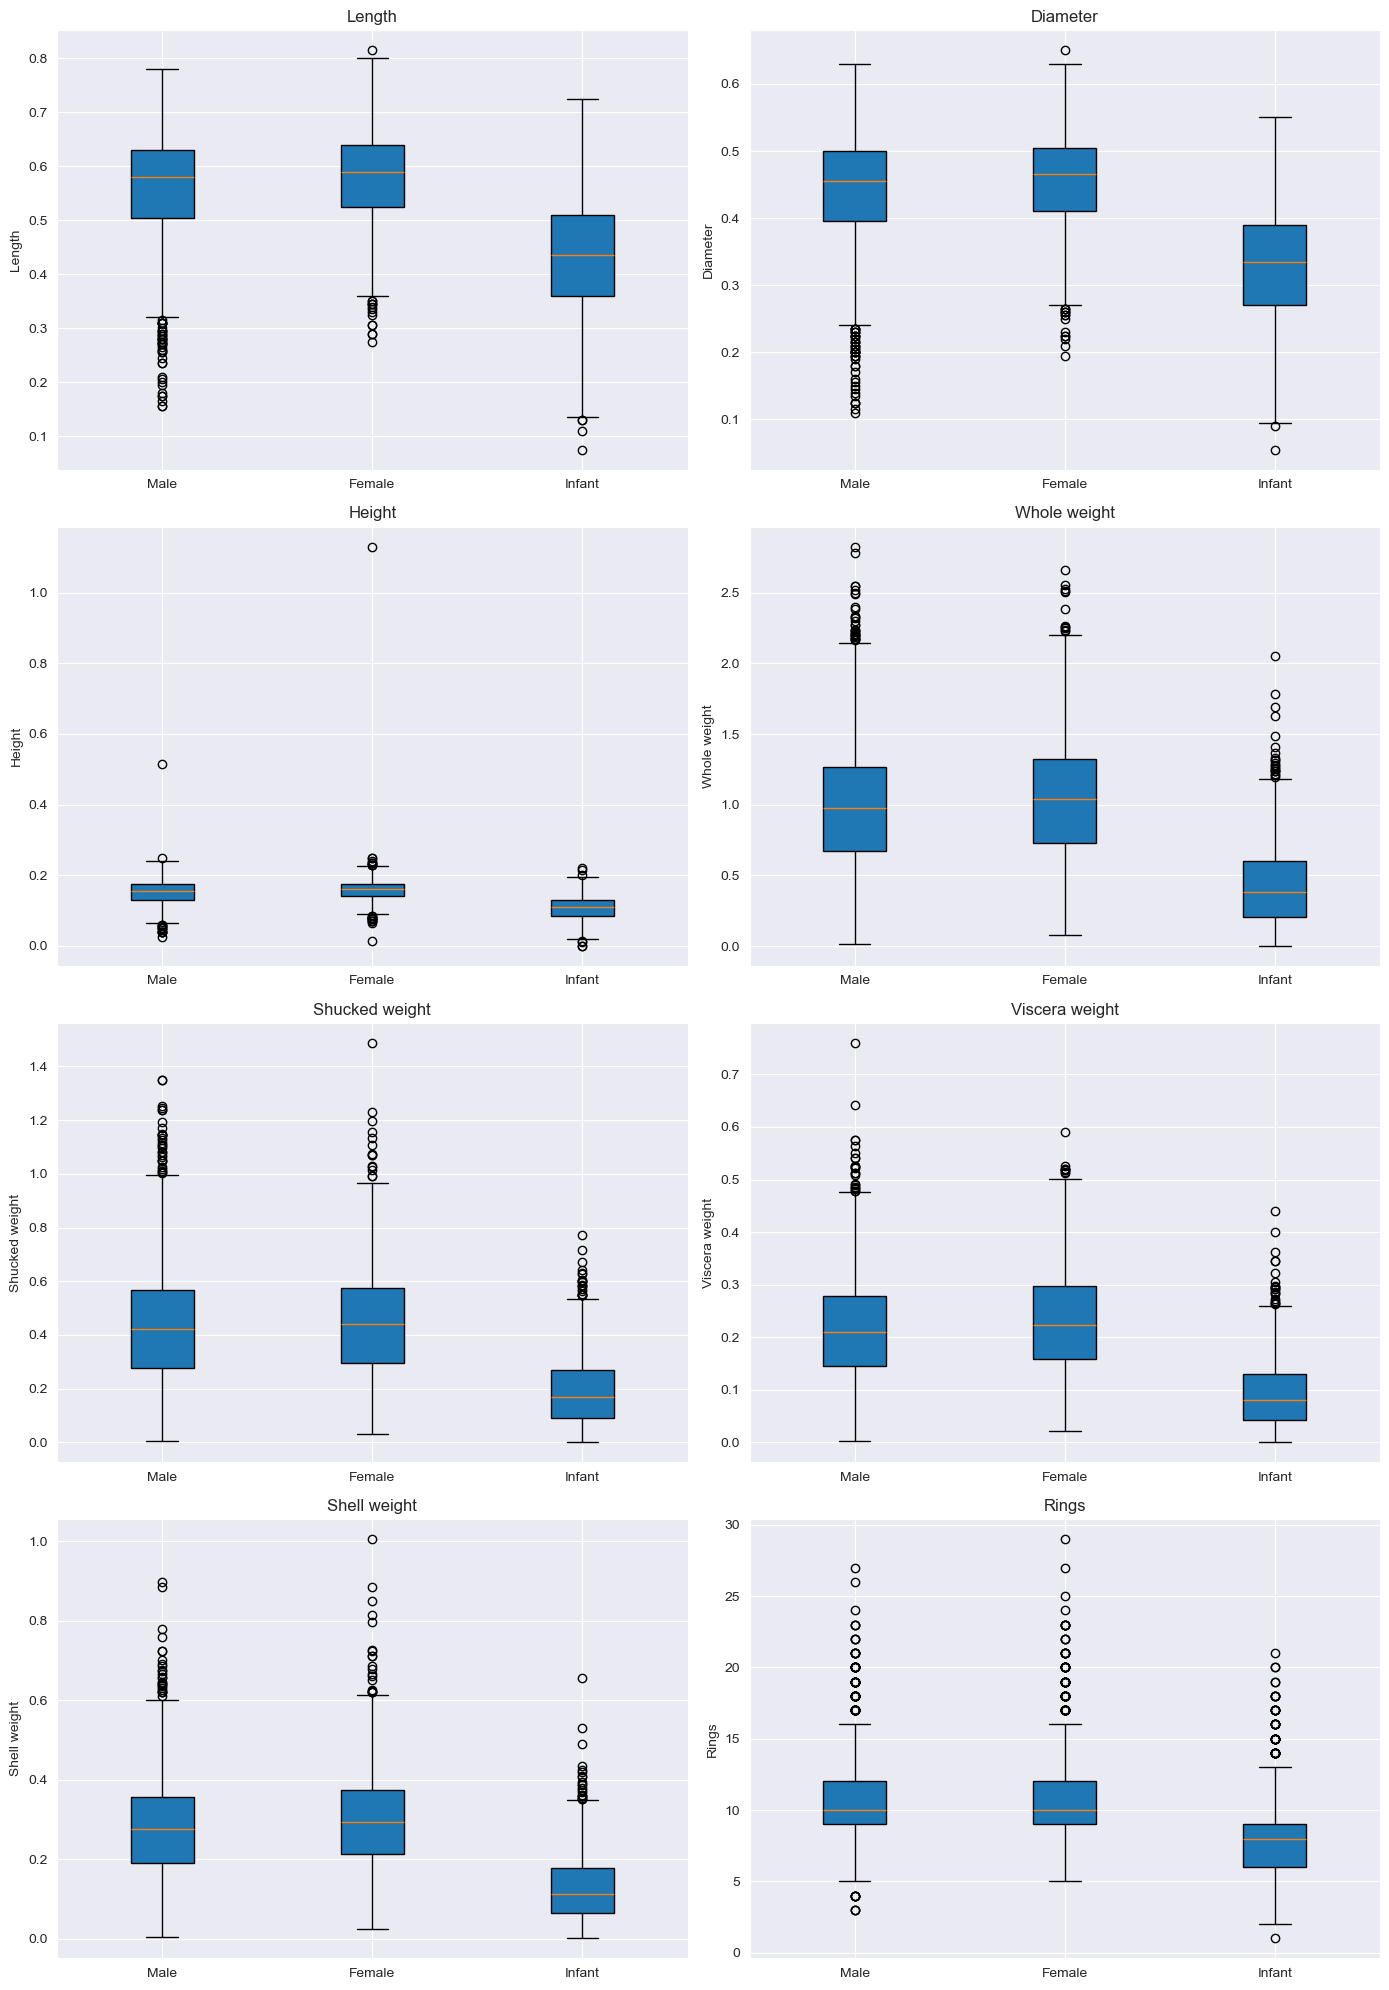

In [12]:
fig, axs = plt.subplots(4, 2, tight_layout=True, figsize=(14, 20))
sex_values = ['M', 'F', 'I']
sex_labels = ['Male', 'Female', 'Infant']

groups = data.groupby('sex')
for i, ax in enumerate(axs.flat):
    vals = [groups.get_group(sex)[columns_to_count[i]] for sex in sex_values]
    
    ax.boxplot(vals, patch_artist=True, tick_labels=sex_labels)
    ax.set_title(f'{titles[i]}')
    ax.set_ylabel(f'{labels[i]}')
    
plt.show()
